### Import packages:

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

from collections import Counter
from scipy import stats
import warnings
warnings.filterwarnings('ignore')

#Show all columns, rows, width
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

### Read & Inspect data:

In [224]:
train_df = pd.read_csv('./data/train.csv', index_col = 0)
test_df = pd.read_csv('./data/test.csv', index_col = 0)

idx = test_df[test_df.GarageYrBlt == 2207.0].index
test_df.loc[idx,'GarageYrBlt'] = 2007.0

full_data = [train_df, test_df]

# Combining data:
combine = pd.concat(full_data)
combine_c = combine.copy()

#categorical data and numeric data
cat_features = combine.dtypes[combine.dtypes == 'object'].index
num_features = combine.dtypes[combine.dtypes != 'object'].index

cat_extra = ['MSSubClass', 'OverallCond', 'OverallQual']
combine[cat_extra] = combine[cat_extra].astype('object')

cat_features = combine.dtypes[combine.dtypes == 'object'].index
num_features = combine.dtypes[combine.dtypes != 'object'].index

## Data Cleaning:

### Missing imputation:

In [225]:
# define function to impute missing value
def impute_missing(dfName):
    
    # impute Continous numeric Variables   
#     dfName['GarageYrBlt'] = dfName['GarageYrBlt'].fillna(min(dfName['GarageYrBlt']))
#     dfName['LotFrontage'] = dfName.groupby("Neighborhood")["LotFrontage"].transform(lambda x: x.fillna(x.median()))

    dfName['GarageYrBlt'] = dfName['GarageYrBlt'].fillna(0)
    meanLA = dfName['LotArea'].mean()
    meanLF = dfName['LotFrontage'].mean()
    ratio = meanLF/meanLA
    dfName['LotFrontage'] = dfName['LotFrontage'].fillna(ratio*dfName['LotArea'])
    
    # impute 0
    for col in num_features:
        dfName[col].fillna(0, inplace = True)
    
    dfName['Functional'] = dfName['Functional'].fillna('Typ')
    
   # impute categorical variable missing not at Random with the mode value  
    for col in ('Electrical','MSZoning' , 'Exterior1st', 'Exterior2nd','KitchenQual', 'SaleType'):
        dfName[col].fillna(dfName[col].mode()[0], inplace = True)
  
    # impute None
    for col in cat_features:
        dfName[col].fillna('None', inplace = True)
        
impute_missing(combine)

### Box- cox transformation:

In [226]:
combine[['GrLivArea', '1stFlrSF', 'LotArea','LotFrontage','GarageArea','BsmtUnfSF']] = np.log(combine[['GrLivArea', '1stFlrSF', 'LotArea','LotFrontage','GarageArea','BsmtUnfSF']]+1)

## Dummify:

In [227]:
combine = pd.get_dummies(combine, drop_first=True)
dtrain = combine[combine.SalePrice!=0]
dtest = combine[combine.SalePrice==0].drop('SalePrice',1)
print(dtrain.shape)
print(dtest.shape)
dtrain.sample(5)

(1460, 261)
(1459, 260)


,1stFlrSF,2ndFlrSF,3SsnPorch,BedroomAbvGr,BsmtFinSF1,BsmtFinSF2,BsmtFullBath,BsmtHalfBath,BsmtUnfSF,EnclosedPorch,Fireplaces,FullBath,GarageArea,GarageCars,GarageYrBlt,GrLivArea,HalfBath,KitchenAbvGr,LotArea,LotFrontage,LowQualFinSF,MSSubClass,MasVnrArea,MiscVal,MoSold,OpenPorchSF,OverallCond,OverallQual,PoolArea,SalePrice,ScreenPorch,TotRmsAbvGrd,TotalBsmtSF,WoodDeckSF,YearBuilt,YearRemodAdd,YrSold,Alley_None,Alley_Pave,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,BsmtCond_Gd,BsmtCond_None,BsmtCond_Po,BsmtCond_TA,BsmtExposure_Gd,BsmtExposure_Mn,BsmtExposure_No,BsmtExposure_None,BsmtFinType1_BLQ,BsmtFinType1_GLQ,BsmtFinType1_LwQ,BsmtFinType1_None,BsmtFinType1_Rec,BsmtFinType1_Unf,BsmtFinType2_BLQ,BsmtFinType2_GLQ,BsmtFinType2_LwQ,BsmtFinType2_None,BsmtFinType2_Rec,BsmtFinType2_Unf,BsmtQual_Fa,BsmtQual_Gd,BsmtQual_None,BsmtQual_TA,CentralAir_Y,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,Condition2_Feedr,Condition2_Norm,Condition2_PosA,Condition2_PosN,Condition2_RRAe,Condition2_RRAn,Condition2_RRNn,Electrical_FuseF,Electrical_FuseP,Electrical_Mix,Electrical_SBrkr,ExterCond_Fa,ExterCond_Gd,ExterCond_Po,ExterCond_TA,ExterQual_Fa,ExterQual_Gd,ExterQual_TA,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,Fence_GdWo,Fence_MnPrv,Fence_MnWw,Fence_None,FireplaceQu_Fa,FireplaceQu_Gd,FireplaceQu_None,FireplaceQu_Po,FireplaceQu_TA,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,Functional_Maj2,Functional_Min1,Functional_Min2,Functional_Mod,Functional_Sev,Functional_Typ,GarageCond_Fa,GarageCond_Gd,GarageCond_None,GarageCond_Po,GarageCond_TA,GarageFinish_None,GarageFinish_RFn,GarageFinish_Unf,GarageQual_Fa,GarageQual_Gd,GarageQual_None,GarageQual_Po,GarageQual_TA,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_None,Heating_GasA,Heating_GasW,Heating_Grav,Heating_OthW,Heating_Wall,HeatingQC_Fa,HeatingQC_Gd,HeatingQC_Po,HeatingQC_TA,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,KitchenQual_Fa,KitchenQual_Gd,KitchenQual_TA,LandContour_HLS,LandContour_Low,LandContour_Lvl,LandSlope_Mod,LandSlope_Sev,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,LotShape_IR2,LotShape_IR3,LotShape_Reg,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,MiscFeature_None,MiscFeature_Othr,MiscFeature_Shed,MiscFeature_TenC,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,PavedDrive_P,PavedDrive_Y,PoolQC_Fa,PoolQC_Gd,PoolQC_None,RoofMatl_CompShg,RoofMatl_Membran,RoofMatl_Metal,RoofMatl_Roll,RoofMatl_Tar&Grv,RoofMatl_WdShake,RoofMatl_WdShngl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_Co

## Outlier:

In [228]:
dtrain = dtrain.drop(dtrain[(dtrain.GrLivArea>4000) & (dtrain.SalePrice<300000)].index)
dtrain.shape

(1460, 261)

## Feature Engineering:

#### Add categorical col for 0 value:

In [229]:
inputcols = ['2ndFlrSF','BsmtFinSF1','BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',\
             'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch',\
            'LowQualFinSF', 'PoolArea', 'MasVnrArea', 'MiscVal']
outputcols = ['has2ndflr', 'hasbsmt1', 'hasbsmt2', 'isbsmtcomplete', 'hasbsmt', 'hasgarage', 'haswooddeck', 'hasopenporch',\
             'hasenclosedporch', 'has3ssnporch', 'hasscreenporch', 'islowqualfin', 'haspool', 'hasmasvnr', 'hasmiscval']

def add_categorical_col(df, inputcols, outputcols):
    if len(inputcols) != len(outputcols):
        raise "Col len does not equal"
    for index,inputcol in enumerate(inputcols):
        df[outputcols[index]] = df[inputcol].apply(lambda x: 0 if x == 0 else 1)

add_categorical_col(dtrain, inputcols,outputcols)
add_categorical_col(dtest, inputcols,outputcols)
print(dtrain.shape)
print(dtest.shape)

(1460, 276)
(1459, 275)


In [230]:
#adding square foots
dtrain['TotalSF'] = dtrain['TotalBsmtSF'] + dtrain['1stFlrSF'] + dtrain['2ndFlrSF']
dtest['TotalSF'] = dtest['TotalBsmtSF'] + dtest['1stFlrSF'] + dtest['2ndFlrSF']

dtrain['Age_at_purchase'] = dtrain['YrSold'] - dtrain['YearBuilt']
dtest['Age_at_purchase'] = dtest['YrSold'] - dtest['YearBuilt']
print(dtrain.shape)
print(dtest.shape)

(1460, 278)
(1459, 277)


#### Add ratio col:

In [231]:
def add_col_ratio(df):
    df['tota'] = df['LotArea'] + df['BsmtFinSF1'] + df['BsmtFinSF2'] + df['1stFlrSF'] + df['2ndFlrSF'] + df['GrLivArea'] + df['GarageArea']
    df['totfb'] = df['BsmtFullBath'] + df['FullBath']
    df['tothb'] = df['BsmtHalfBath'] + df['HalfBath']
    df['totbabgr'] = df['FullBath'] + df['HalfBath']
    df['totb'] = df['BsmtFullBath'] + df['BsmtHalfBath'] + df['FullBath'] + df['HalfBath']
    
    df['tota_totb'] = df['totb']/df['tota']
    df['tota_totfb'] = df['totfb']/df['tota']
    df['tota_tothb'] = df['tothb']/df['tota']
    df['tota_br'] = df['BedroomAbvGr']/df['tota']
    df['tota_kc'] = df['KitchenAbvGr']/df['tota']
    df['tota_totrs'] = df['TotRmsAbvGrd']/df['tota']
    df['tota_gc'] = df['GarageCars']/df['tota']
    df['totbath_br'] = df['BedroomAbvGr']/(df['totbabgr']+1)
    df['totfb_br'] = df['totfb']/(df['BedroomAbvGr']+1)
    df['tothb_br'] = df['tothb']/(df['BedroomAbvGr']+1)
    df['totb_totrm'] = df['TotRmsAbvGrd']/(df['totbabgr']+1)
    df['brm_kitchen'] = df['KitchenAbvGr']/(df['BedroomAbvGr']+1)
    df['totrm_garacar'] = df['GarageCars']/(df['TotRmsAbvGrd']+1)
    
add_col_ratio(dtrain)
add_col_ratio(dtest)
print(dtrain.shape)
print(dtest.shape)

(1460, 296)
(1459, 295)


## Feature selection:

In [232]:
# import sklearn.feature_selection as fs

# features = dtrain.drop('SalePrice', axis = 1)
# price = dtrain.SalePrice

# dtrain = fs.SelectKBest(fs.chi2, k=60).fit_transform(features, price)
# dtrain.shape
# dtrain = pd.DataFrame(dtrain)

## Pre-Modeling:

In [234]:
from sklearn.preprocessing import RobustScaler
import sklearn.model_selection as ms
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.metrics import mean_squared_error
from math import sqrt
import sklearn.metrics
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,RandomizedSearchCV
lasso = Lasso()
ridge = Ridge()
net = ElasticNet()

rob = RobustScaler()

In [146]:
# features = dtrain.drop('SalePrice', axis = 1)
# price = np.log(dtrain.SalePrice)

# #split
# X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=38)

# alphas = np.linspace(1e-14,1e-3,500)
# lasso.set_params(normalize=True)
# coefs_lasso  = []

# for alpha in alphas:
#         lasso.set_params(alpha=alpha)
#         lasso.fit(X_train, y_train)  
#         coefs_lasso.append(lasso.coef_)

# coefs_lasso = pd.DataFrame(coefs_lasso, index = alphas)  
# for name in coefs_lasso.columns:
#     plt.plot(coefs_lasso.index, coefs_lasso[name], label=name)
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')

In [147]:
# features = dtrain.drop('SalePrice', axis = 1)
# price = np.log(dtrain.SalePrice)

# #split
# X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=38)

# alphas = np.linspace(0.00001,100,500)
# ridge.set_params(normalize=True)
# coefs  = []
# scores = []
# for alpha in alphas:
#         ridge.set_params(alpha=alpha)
#         ridge.fit(X_train, y_train)  
#         coefs.append(ridge.coef_)
#         scores.append(ridge.score(X_train, y_train))
# coefs = pd.DataFrame(coefs, index = alphas)

# plt.rcParams['figure.figsize'] = (10,5)
# for name in coefs.columns:
#     plt.plot(coefs.index, coefs[name], label=name)
# plt.xlabel(r'hyperparameter $\lambda$')
# plt.ylabel(r'slope values')

Text(0,0.5,'RMSE')

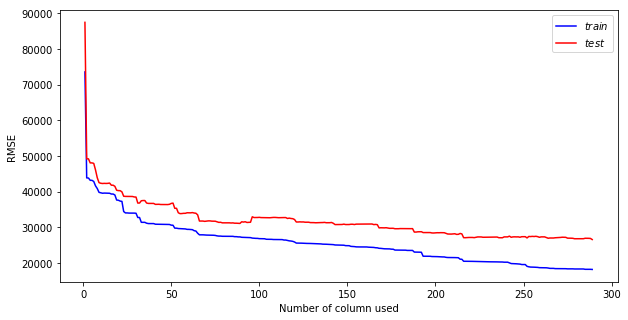

In [187]:
# import sklearn.feature_selection as fs
# from sklearn import linear_model
# ols = linear_model.LinearRegression()

# features = dtrain.drop('SalePrice', axis = 1).copy()
# price = dtrain.SalePrice

# ks = range(1,290)
# train_score=[]
# test_score=[]

# for k in ks:
#     dtrain1 = fs.SelectKBest(fs.chi2, k=k).fit_transform(features, price).copy()
#     features1 = pd.DataFrame(dtrain1).copy()
#     X_train, X_test, y_train, y_test = train_test_split(features1, price, test_size=0.2, random_state=38)
#     lasso.set_params(normalize = True)
#     lasso.fit(X_train,y_train)
#     ypred_train = lasso.predict(X_train)
#     ypred_test = lasso.predict(X_test)

# #     train_score.append(sqrt(mean_squared_error(np.log(y_train), np.log(ypred_train))))
# #     test_score.append(sqrt(mean_squared_error(np.log(y_test), np.log(ypred_test))))
    
#     train_score.append(sqrt(mean_squared_error(y_train, ypred_train)))
#     test_score.append(sqrt(mean_squared_error(y_test, ypred_test)))
# #     train_score.append(ols.score(X_train, y_train))
# #     test_score.append(ols.score(X_test, y_test))
    
# plt.plot(ks,train_score, c='b',label=r'$train$')
# plt.plot(ks,test_score, c='r',label=r'$test$')
# plt.legend(loc=1)
# plt.xlabel(r'Number of column used')
# plt.ylabel(r'RMSE')

In [238]:
#Ridge
features = dtrain.drop('SalePrice', axis = 1)
price = np.log(dtrain.SalePrice)
#split
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=38)

rob.fit(X_train)

param_grid = [
  {'alpha': list(np.linspace(21,23,10))}
 ]

cv_ridge = GridSearchCV(ridge, param_grid, cv=10, n_jobs=-1)
cv_ridge.fit(rob.transform(X_train),y_train)
print(cv_ridge.best_params_)
print(cv_ridge.best_score_)
alpha_ridge = cv_ridge.best_params_['alpha']

cv_ridge.set_params()
print('This is R^2 %f!' %cv_ridge.score(rob.transform(X_train),y_train))
ypred = cv_ridge.predict(rob.transform(X_test))
print('This is RMSE %f!' %sqrt(mean_squared_error(np.log(y_test), np.log(ypred))))

{'alpha': 22.11111111111111}
0.8721299834271566
This is R^2 0.928158!
This is RMSE 0.011960!


In [11]:
#Lasso
features = dtrain.drop('SalePrice', axis = 1)
price = np.log(dtrain.SalePrice)

#split
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=38)

param_grid = [
  {'alpha': list(np.linspace(1e-10,100,10))}
 ]

cv_lasso = GridSearchCV(lasso, param_grid, cv=10, n_jobs=-1)
cv_lasso.fit(X_train, y_train)

alpha_lasso = cv_lasso.best_params_['alpha']

cv_lasso.set_params()
cv_lasso.fit(X_train, y_train)
ypred = cv_lasso.predict(X_test)


print(cv_lasso.best_params_)
print(cv_lasso.best_score_)
print('This is R^2 %f!' %cv_lasso.score(X_test, y_test))
print('This is RMSE %f!' %sqrt(mean_squared_error(np.log(y_test), np.log(ypred))))


{'alpha': 77.7777777778}
0.8216612994943974
This is R^2 0.852958!
This is RMSE 0.163824!


In [13]:
#enet
features = dtrain.drop('SalePrice', axis = 1)
price = np.log(dtrain.SalePrice)
#Split
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=38)

param_grid = [
  {'alpha': list(np.linspace(1e-10,100,10)), 'l1_ratio': np.arange(0.0, 1.0, 0.1)}
 ]

enet = ElasticNet()
cv_enet = GridSearchCV(enet, param_grid, cv=10, n_jobs=-1)
cv_enet.fit(X_train, y_train)
print(cv_enet.best_params_)
print(cv_enet.best_score_)

cv_enet.set_params()
cv_enet.fit(X_train, y_train)
print('This is R^2 %f!' %cv_enet.score(X_test, y_test))
ypred = cv_enet.predict(X_test)
print('This is RMSE %f!' %sqrt(mean_squared_error(np.log(y_test), np.log(ypred))))

{'alpha': 1e-10, 'l1_ratio': 0.0}
0.8134182444946862
This is R^2 0.856268!
This is RMSE 0.165894!


In [217]:
# Tree model
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder
from scipy.stats import randint as sp_randint

X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=38)

tree_model = DecisionTreeRegressor()
grid_tree = {
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}

grid_search_tree = RandomizedSearchCV(tree_model, grid_tree, cv = 10, n_jobs=-1, verbose = 1)
%time grid_search_tree.fit(X_test, y_test)
print(grid_search_tree.best_params_)
print(grid_search_tree.best_score_)

tree_model.set_params(min_samples_leaf = grid_search_tree.best_params_['min_samples_leaf'],
                     min_samples_split = grid_search_tree.best_params_['min_samples_split'])

tree_model.fit(X_train,y_train)
print('This is R^2 %f!' %tree_model.score(X_test, y_test))
ypred = tree_model.predict(X_test)
print('This is RMSE %f!' %sqrt(mean_squared_error(np.log(y_test), np.log(ypred))))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.


Wall time: 232 ms
{'min_samples_split': 10, 'min_samples_leaf': 1}
0.7488561593874381
This is R^2 0.847780!
This is RMSE 0.169215!


[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    0.1s finished


In [218]:
#Random Forest
from sklearn.ensemble import RandomForestRegressor
randomForest = RandomForestRegressor()
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=38)

random_grid = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

grid_search_random = RandomizedSearchCV(randomForest,
                                 random_grid,
                                 cv = 10,
                                 n_jobs = -1,
                                 verbose = 1)
%time grid_search_random.fit(X_test, y_test)
print(grid_search_random.best_params_)
print(grid_search_random.best_score_)
randomForest.set_params(
    n_estimators = grid_search_random.best_params_['n_estimators'], 
    min_samples_split = grid_search_random.best_params_['min_samples_split'], 
    min_samples_leaf= grid_search_random.best_params_['min_samples_leaf'], 
    max_features = grid_search_random.best_params_['max_features'], 
    max_depth = grid_search_random.best_params_['max_depth'])

randomForest.fit(X_test, y_test)
print('This is R^2 %f!' %randomForest.score(X_test, y_test))
ypred = randomForest.predict(X_test)
print('This is RMSE %f!' %sqrt(mean_squared_error(np.log(y_test), np.log(ypred))))

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:   11.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   27.7s finished


Wall time: 32.1 s
{'n_estimators': 1000, 'min_samples_split': 2, 'min_samples_leaf': 2, 'max_features': 'auto', 'max_depth': 70}
0.8620616398402532
This is R^2 0.985248!
This is RMSE 0.056340!


In [ ]:
#xgboost
from xgboost import XGBRegressor
import xgboost as xgb
X_train, X_test, y_train, y_test = train_test_split(features, price, test_size=0.2, random_state=38)

xgbreg = XGBRegressor(learning_rate =0.01, 
                      n_estimators=140, 
                      max_depth=5,
                      min_child_weight=4,
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.85,
                      scale_pos_weight=1)

gsearch1 = GridSearchCV(
    estimator = xgbreg,param_grid=param_test1,
    n_jobs=-1,
    cv=10,
    verbose=1)
gsearch1.fit(X_test, y_test)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

xgb = XGBRegressor( n_estimators=140, 
                    max_depth=5,
                    min_child_weight=4, 
                    gamma=0, 
                    subsample=0.8, 
                    colsample_bytree=0.85,
                    scale_pos_weight=1)
xgb.set_params(eta = .001)
xgb.fit(X_test, y_test)
print('This is R^2 %f!' %xgb.score(X_test, y_test))
ypred = xgb.predict(X_test)
print('This is RMSE %f!' %sqrt(mean_squared_error(np.log(y_test), np.log(ypred))))

## Modeling:

In [15]:
#Lasso
# features = dtrain.drop('SalePrice', axis = 1)
# price = np.log(dtrain.SalePrice)

# param_grid = [
#   {'alpha': list(np.linspace(1e-10,100,10))}
#  ]

# cv_lasso = GridSearchCV(lasso, param_grid, cv=10, n_jobs=-1)
# cv_lasso.fit(features,price)
# print(cv_lasso.best_params_)
# print(cv_lasso.best_score_)
# alpha_lasso = cv_lasso.best_params_['alpha']

# cv_lasso.set_params()
# cv_lasso.fit(features, price)
# cv_lasso.score(features, price)

In [242]:
# Ridge
features = dtrain.drop('SalePrice', axis = 1)
price = np.log(dtrain.SalePrice)
rob.fit(X_train)

param_grid = [
  {'alpha': list(np.linspace(21,23,10))}
 ]

features = dtrain.drop('SalePrice', axis = 1)
price = np.log(dtrain.SalePrice)

cv_ridge = GridSearchCV(ridge, param_grid, cv=10, n_jobs=-1)
cv_ridge.fit(rob.transform(X_train),y_train)
print(cv_ridge.best_params_)
print(cv_ridge.best_score_)

cv_ridge.score(rob.transform(X_train),y_train)

{'alpha': 22.11111111111111}
0.8721299834271566


0.9281575779150427

In [211]:
# # enet
# features = dtrain.drop('SalePrice', axis = 1)
# price = np.log(dtrain.SalePrice)

# param_grid = [
#   {'alpha': list(np.linspace(1e-10,100,10)), 'l1_ratio': np.arange(0.0, 1.0, 0.1)}
#  ]

# enet = ElasticNet()
# cv_enet = GridSearchCV(enet, param_grid, cv=10, n_jobs=-1)
# cv_enet.fit(features,price)
# print(cv_enet.best_params_)
# print(cv_enet.best_score_)

# cv_enet.set_params()
# cv_enet.fit(features, price)
# cv_enet.score(features, price)

In [ ]:
#Tree model
features = dtrain.drop('SalePrice', axis = 1)
price = np.log(dtrain.SalePrice)

tree_model = DecisionTreeRegressor()
grid_tree = {
    "min_samples_leaf": range(1, 10),
    "min_samples_split": np.linspace(start=2, stop=30, num=15, dtype=int)
}

grid_search_tree = RandomizedSearchCV(tree_model, grid_tree, cv = 10, n_jobs=-1, verbose = 1)
print(grid_search_tree.best_params_)
print(grid_search_tree.best_score_)

tree_model.set_params(min_samples_leaf = grid_search_tree.best_params_['min_samples_leaf'],
                     min_samples_split = grid_search_tree.best_params_['min_samples_split'])
tree_model.fit(features, price)
tree_model.score(features, price)

In [219]:
#Random Forest
features = dtrain.drop('SalePrice', axis = 1)
price = np.log(dtrain.SalePrice)

random_grid = {
    'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
    'max_features': ['auto', 'sqrt'],
    'min_samples_leaf': [1, 2, 4],
    'min_samples_split': [2, 5, 10],
    'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]
}

grid_search_random = RandomizedSearchCV(randomForest,
                                 random_grid,
                                 cv = 10,
                                 n_jobs = -1,
                                 verbose = 1)
%time grid_search_random.fit(features, price)
print(grid_search_random.best_params_)
print(grid_search_random.best_score_)
randomForest.set_params(
    n_estimators = grid_search_random.best_params_['n_estimators'], 
    min_samples_split = grid_search_random.best_params_['min_samples_split'], 
    min_samples_leaf= grid_search_random.best_params_['min_samples_leaf'], 
    max_features = grid_search_random.best_params_['max_features'], 
    max_depth = grid_search_random.best_params_['max_depth'])

randomForest.fit(features, price)
randomForest.score(features, price)

Fitting 10 folds for each of 10 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  26 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:  3.3min finished


Wall time: 3min 57s
{'n_estimators': 1400, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'auto', 'max_depth': None}
0.8938499841785996


0.9110688861632165

In [ ]:
#xgboost

features = dtrain.drop('SalePrice', axis = 1)
price = np.log(dtrain.SalePrice)

xgbreg = XGBRegressor(learning_rate =0.01, 
                      n_estimators=140, 
                      max_depth=5,
                      min_child_weight=4,
                      gamma=0, 
                      subsample=0.8, 
                      colsample_bytree=0.85,
                      scale_pos_weight=1)

gsearch1 = GridSearchCV(
    estimator = xgbreg,param_grid=param_test1,
    n_jobs=-1,
    cv=10,
    verbose=1)
gsearch1.fit(features, price)
print(gsearch1.best_params_)
print(gsearch1.best_score_)

xgb = XGBRegressor( n_estimators=140, 
                    max_depth=5,
                    min_child_weight=4, 
                    gamma=0, 
                    subsample=0.8, 
                    colsample_bytree=0.85,
                    scale_pos_weight=1)
xgb.set_params(eta = .001)
xgb.fit(features, price)
tree_model.score(features, price)

## Write Data:

In [244]:
# x = pd.concat([dtest.reset_index(), pd.Series(np.exp(cv_lasso.predict(dtest))).rename('SalePrice')], axis=1)[['Id', 'SalePrice']].set_index('Id')
# x.to_csv('lasso_result.csv')

x = pd.concat([dtest.reset_index(), pd.Series(np.exp(cv_ridge.predict(rob.transform(dtest)))).rename('SalePrice')], axis=1)[['Id', 'SalePrice']].set_index('Id')
x.to_csv('ridge_result.csv')

# x = pd.concat([dtest.reset_index(), pd.Series(np.exp(cv_enet.predict(dtest))).rename('SalePrice')], axis=1)[['Id', 'SalePrice']].set_index('Id')
# x.to_csv('enet_result.csv')

# x = pd.concat([dtest.reset_index(), pd.Series(np.exp(tree_model.predict(dtest))).rename('SalePrice')], axis=1)[['Id', 'SalePrice']].set_index('Id')
# x.to_csv('tree_model_result.csv')

# x = pd.concat([dtest.reset_index(), pd.Series(np.exp(randomForest.predict(dtest))).rename('SalePrice')], axis=1)[['Id', 'SalePrice']].set_index('Id')
# x.to_csv('randomForest_result.csv')

# x = pd.concat([dtest.reset_index(), pd.Series(np.exp(xgb.predict(dtest))).rename('SalePrice')], axis=1)[['Id', 'SalePrice']].set_index('Id')
# x.to_csv('xgb_result.csv')